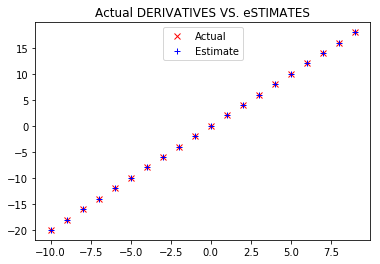

In [7]:
import random
from __future__ import division
import math
from matplotlib import pyplot as plt
from collections import Counter
from functools import partial

def sum_of_squares(v):
    return sum(v_i **2 for v_i in v)


def difference_quotient(f,x,h):
    return (f(x+h)-f(x))/h

def square(x):
    return x*x

def derivative(x):
    return 2*x

derivative_estimate=partial(difference_quotient,square,h=0.0001)

x=range(-10,10)
plt.title("Actual DERIVATIVES VS. eSTIMATES")
plt.plot(x,map(derivative,x), 'rx',label='Actual')
plt.plot(x,map(derivative_estimate,x), 'b+',label='Estimate')

plt.legend(loc=9)
plt.show()

In [10]:
#多個偏導數

def partial_difference_quotient(f,v,i,h):
    w=[v_j+(h if j==i else 0) for j,v_j in enumerate(v)]
    
    return (f(w)-f(v))/h

def estimate_gradient(f,v,h=0.00001):
    return [partial_difference_quotient(f,v,h) for i,_ in enumerate(v)]



#運用

def step(v,direction,step_size):
    return [v_i+step_size * direction_i for v_i,direction_i in zip(v,direction)]

def sum_of_squares_gradient(v):
    return [2*v_i for v_i in v]

v=[random.randint(-10,10) for i in range(3)]

tolerance=0.0000001

while True:
    gradient=sum_of_squares_gradient(v)
    next_v=step(v,gradient,-0.01)
    if distance(next_v,v)< tolerance:
        break
    v=next_v



NameError: name 'distance' is not defined

In [11]:
step_sizes=[100,10,1,0.1,0.01,0.001,0.0001,0.00001]

def safe(f):
    def safe_f(*args,**kwargs):
        try:
            return f(*args,**kwargs)
        except:
            return float('inf')
    return safe(f)



#最小化處理程序
def minimize_batch(target_fn,gradient_fn,theta_0,tolerance=0.000001):
    
    step_sizes=[100,10,1,0.1,0.01,0.001,0.0001,0.00001]
    
    theta=theta_0
    target_fn=sage(target_fn)
    value=target_fn(theta)
    
    while True:
        gradient=gradient_fn(theta)
        next_thetas=[step(theta,gradient,-step_size) for step_size in step_sizes]
        
        next_theta=min(next_thetas,key=target_fn)
        next_value=target_fn(next_theta)
        
        if abs(value-next_value) < tolerance:
            return theta
        else:
            theta,value=next_theta,next_value
            

#隨機梯度遞減
def in_random_order(data):
    indexes=[i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
    
def minimize_stochastic(target_fn,gradient_fn,x,y,theta_0,alpha_0=0.01):
    
    data=zip(x,y)
    theta=theta_0 #猜測值
    alpha=alpha_0 #初始間隔長度 step
    min_theta,min_value=None,float('inf')   #目前的最小值
    iteration_with_no_improvement=0
    
    while iterations_with_no_improvement<100:
        value=sum(target_fn(x_i,y_i,theta) for x_i,y_i in data)
        
        if value<min_value:
            min_theta,min_value=theta,value
            iterations_with_no_improvement=0
            alpha=alpha_0
        else:
            iterations_with_no_improvement+=1
            alpha*=0.9
        
        for x_i,y_i in in_random_order(data):
            gradient_i =gradient_fn(x_i,y_i,theta)
            theta=vector_subtract(theta,scalar_multiply(alpha,gradient_i))
    
    return min_theta

